Batching datasets...
Model loaded from /home/kvake/HiggsAnalysisBc/models/mlp_regression_model.keras
12742/12742 ━━━━━━━━━━━━━━━━━━━━ 12s 927us/step


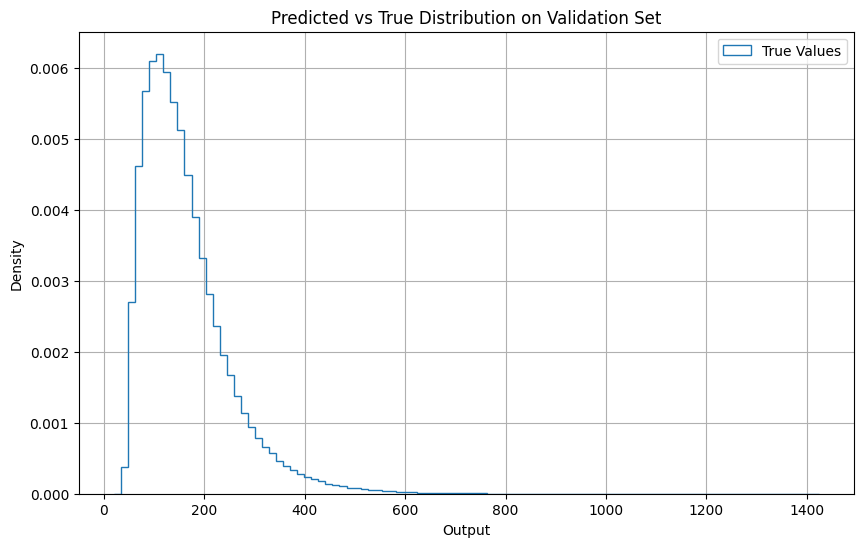

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from ModelClass import RegressionModel
from DatasetClass import DatasetPt
from src.helpers import pick_only_data, extract_data

# === 1. Načítaj dáta (z validácie) ===
erik_data = "/scratch/ucjf-atlas/htautau/SM_Htautau_R22/V02_skim_mva_01/*/*/*/*/*H125*.root"
dataset = DatasetPt(file_paths=erik_data)
dataset.load_data()  # musíš mať uložený dataset v priečinku "data/"

# === 2. Inicializuj model a načítaj ho z disku ===
model = RegressionModel(dataset=dataset)
model.prepare_dataset()
model.load()  # načíta z "models/mlp_regression_model.keras"

# === 4. Spusti predikciu (vráti NumPy array) ===
y_pred = model.model.predict(model.val_batch)

# === 5. Získaj pravé hodnoty z validačného datasetu
y_true = np.array(extract_data(dataset.val_dataset.map(lambda x, y: y))).flatten()


# print("y_pred shape:", y_pred.shape)
# print("y_true shape:", y_true.shape)

# print("y_pred min/max:", np.min(y_pred), np.max(y_pred))
# print("y_true min/max:", np.min(y_true), np.max(y_true))

# print("y_pred nan?", np.isnan(y_pred).any())
# print("y_true nan?", np.isnan(y_true).any())


plt.figure(figsize=(10, 6))
plt.hist(y_true, bins=100, histtype='step', label='True Values', density=True)
plt.hist(y_pred.flatten(), bins=100, histtype='step', label='Predicted Values', density=True)
plt.xlabel("Output")
plt.ylabel("Density")
plt.title("Predicted vs True Distribution on Validation Set")
plt.legend()
plt.grid(True)
plt.savefig("predicted_vs_true_distribution.png", dpi=300)
